In [2]:
import matplotlib.pyplot as plt
import numpy as np
from json import load

# Batchsize - Speed experiment on LeNet-300-100 with MNIST

In [2]:
batch_sizes = [2**i for i in range(13, 4, -1)]
# slower
frs = 1000/np.array([3.128, 3.149, 1.876, 2.773, 5.839, 10.55, 21.356, 40.802, 89.829])
fqs = 1000/np.array([13.213, 16.693, 24.539, 37.976, 44.843, 62.014, 106.219, 219.722, 447.518])
brs = 1000/np.array([1.625, 2.665, 6.007, 8.011, 17.781, 26.472, 51.359, 99.218, 236.377])
bqs = 1000/np.array([3.845, 7.080, 13.378, 24.690, 37.602, 66.589, 130.599, 285.788, 605.504])

# faster
frf = 1000/np.array([2.833, 2.824, 1.712, 2.488, 4.959, 10.35, 20.993, 40.321, 80.087])
fqf = 1000/np.array([1.741, 2.479, 4.904, 9.589, 19.205, 38.441, 75.729, 148.626, 297.166])
brf = 1000/np.array([1.224, 1.982, 5.231, 6.93, 13.531, 26.507, 51.605, 99.586, 200.908])
bqf = 1000/np.array([4.409, 4.425, 8.499, 17.1, 33.23, 65.43, 129.03, 253.968, 510.735])


s = slice(1, 8, 1)  # start, stop, step
s = slice(9)  # start, stop, step

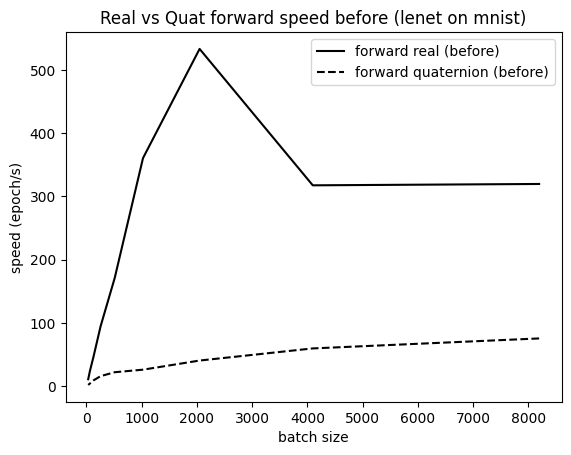

In [3]:
plt.plot(batch_sizes[s], frs[s],   "k", label='forward real (before)')
plt.plot(batch_sizes, fqs, "k--", label='forward quaternion (before)')
plt.xlabel('batch size')
plt.ylabel('speed (epoch/s)')
plt.legend()
plt.title("Real vs Quat forward speed before (lenet on mnist)")
plt.savefig('images/forward_slow.png')
plt.show()

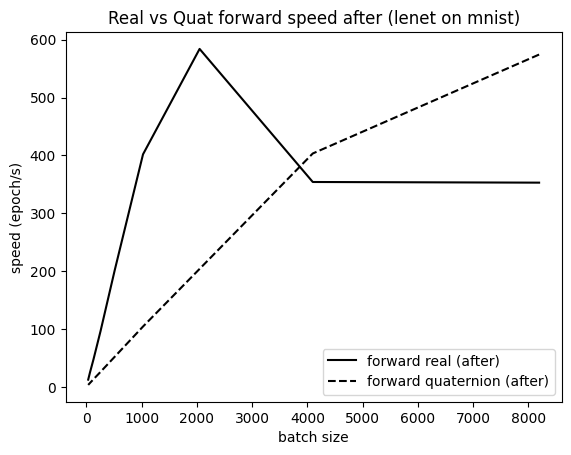

In [4]:
plt.plot(batch_sizes, frf[s],   "k", label='forward real (after)')
plt.plot(batch_sizes[s], fqf[s], "k--", label='forward quaternion (after)')
plt.xlabel('batch size')
plt.ylabel('speed (epoch/s)')
plt.legend()
plt.title("Real vs Quat forward speed after (lenet on mnist)")
plt.savefig('images/forward_fast.png')
plt.show()

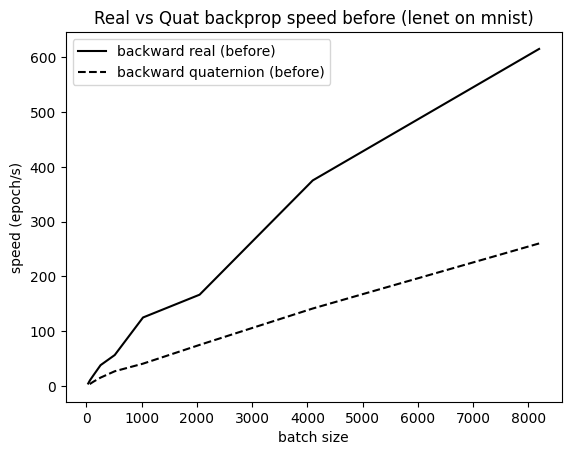

In [5]:
plt.plot(batch_sizes[s], brs[s],   "k", label='backward real (before)')
plt.plot(batch_sizes[s], bqs[s], "k--", label='backward quaternion (before)')
plt.xlabel('batch size')
plt.ylabel('speed (epoch/s)')
plt.legend()
plt.title("Real vs Quat backprop speed before (lenet on mnist)")
plt.savefig('images/backward_slow.png')
plt.show()

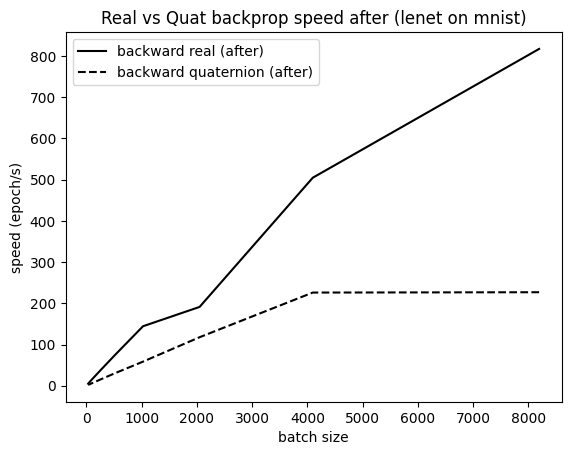

In [6]:
plt.plot(batch_sizes[s], brf[s],   "k", label='backward real (after)')
plt.plot(batch_sizes[s], bqf[s], "k--", label='backward quaternion (after)')
plt.xlabel('batch size')
plt.ylabel('speed (epoch/s)')
plt.legend()
plt.title("Real vs Quat backprop speed after (lenet on mnist)")
plt.savefig('images/backward_fast.png')
plt.show()

# Accuracy Experiment on Cifar10 with conv 6

In [8]:
# you can plot these files:
# 	1. cif10_conv6.json
# 	2. results.json
# 	3. results2.json
# 	4. results3.json	# this is the best one with most data

filename = 'results3.json'

epochs = 80 if filename == 'results3.json' else 200

with open(filename) as f: data = load(f)
batch_sizes = np.array(data["batchsizes"])

test_acc_real  = np.array(data["real_accu"][1])
train_acc_real = np.array(data["real_accu"][0])
test_acc_quat  = np.array(data["quat_accu"][1])
train_acc_quat = np.array(data["quat_accu"][0])

fwd_speed_real = 1000/np.array(data["real_time"][0])
bwd_speed_real = 1000/np.array(data["real_time"][1])
fwd_speed_quat = 1000/np.array(data["quat_time"][0])
bwd_speed_quat = 1000/np.array(data["quat_time"][1])

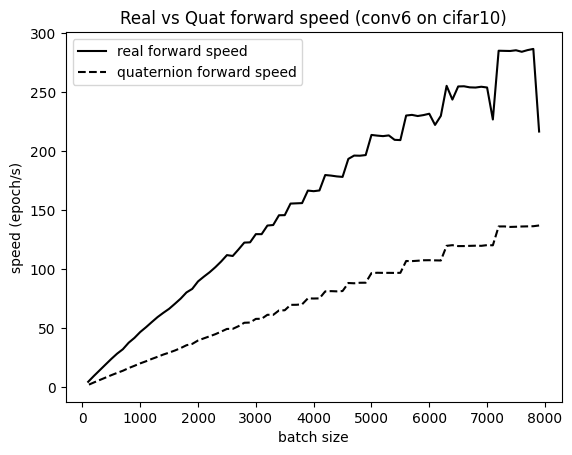

In [9]:
plt.plot(batch_sizes, fwd_speed_real,   "k", label='real forward speed')
plt.plot(batch_sizes, fwd_speed_quat, "k--", label='quaternion forward speed')
plt.xlabel('batch size')
plt.ylabel('speed (epoch/s)')
plt.legend()
plt.title("Real vs Quat forward speed (conv6 on cifar10)")
plt.savefig('images/conv6_cif10_forwardspeed.png')
plt.show()
# @ Adhil: Interesting Observation... quaternion seems to be a step function... why?

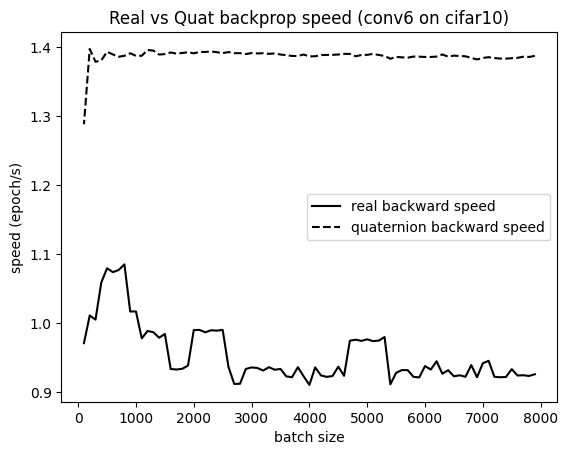

In [10]:
plt.plot(batch_sizes, bwd_speed_real,   "k", label='real backward speed')
plt.plot(batch_sizes, bwd_speed_quat, "k--", label='quaternion backward speed')
plt.xlabel('batch size')
plt.ylabel('speed (epoch/s)')
plt.legend()
plt.title("Real vs Quat backprop speed (conv6 on cifar10)")
plt.savefig('images/conv6_cif10_backwardspeed.png')
plt.show()

In [11]:
def reduce(array, tobelen=None):  # tobelen < len(array)
    """Reduce the length of an array to tobelen by averaging the values."""
    if not tobelen or tobelen >= len(array):
        return array
    new_array = np.zeros(tobelen)
    for i in range(tobelen):
        new_array[i] = np.mean(array[i*len(array)//tobelen:(i+1)*len(array)//tobelen])
    return new_array

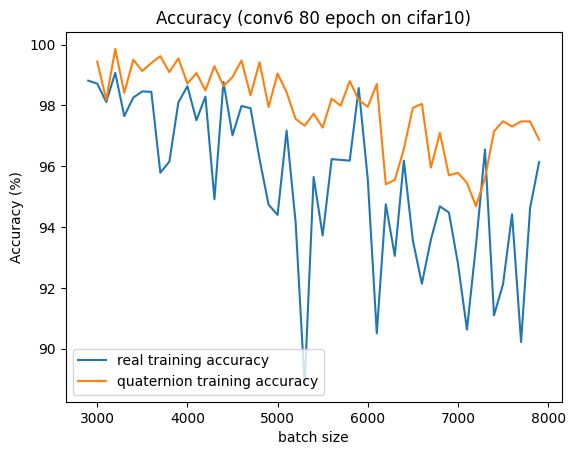

In [17]:
threshold =10
points = 0
Br       = reduce(batch_sizes[train_acc_real>threshold][:50],    points)
Bq       = reduce(batch_sizes[train_acc_quat>threshold][:50],    points)
real_acc = reduce(train_acc_real[train_acc_real>threshold][:50], points)
quat_acc = reduce(train_acc_quat[train_acc_quat>threshold][:50], points)



plt.plot(Br, real_acc, label='real training accuracy')
plt.plot(Bq, quat_acc, label='quaternion training accuracy')
# plt.plot(batch_sizes,  test_acc_real,   "g", label='real test accuracy')
# plt.plot(batch_sizes,  test_acc_quat, "g--", label='quaternion test accuracy')
plt.xlabel('batch size')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title(f"Accuracy (conv6 {epochs} epoch on cifar10)")
plt.savefig('images/accuracy_quatvsreal4.png')
plt.show()

# @ Adhil: Inference: Quaternion model is much more stable than real model
# in batch size. They perform almost equally good in accuracy when trained
# on equal data. their accuracy does not change much with batch size.

# Comparing accuracy of conv_6 with Real4, Real 3 and Quat on Cifar10 (batchsize 1024) wrt epochs

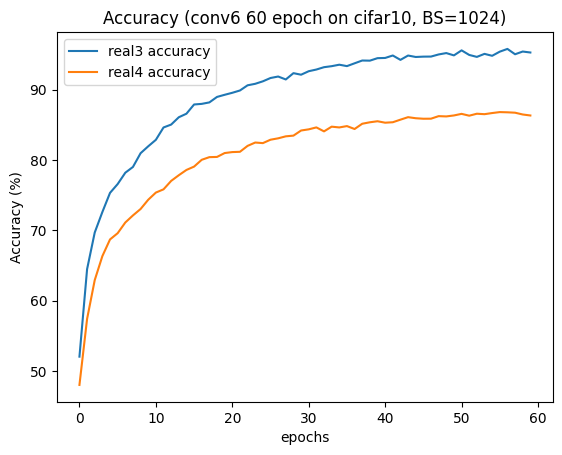

95.28920000000001
86.33439999999999


In [4]:
filename = 'acc_real3_real4_quat_B=1024.json'
with open(filename) as f: results = load(f)

epochs = np.array(results["epochs"])

real3_train = np.array(results["real3_accu"][0])
real3_test  = np.array(results["real3_accu"][1])
real4_train = np.array(results["real4_accu"][0])
real4_test  = np.array(results["real4_accu"][1])
quat_train  = np.array(results["quat_accu" ][0])
# quat_test   = np.array(results["quat_accu" ][1])

plt.plot(epochs, real3_train, label='real3 accuracy')
plt.plot(epochs, real4_train,  label='real4 accuracy')
# plt.plot(epochs, quat_train,  label='quaternion accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title(f"Accuracy (conv6 {len(epochs)} epoch on cifar10, BS=1024)")
plt.savefig('images/accuracy_real3vsreal4_Bs1024.png')
plt.show()

print(real3_train[-1])
print(real4_train[-1])